# House Sales in King County, USA 
Predict house price using regression
Dataset taken from www.kaggle.com

Project for 'Data scientist' course. __Reti S.p.a.__

__Emanuele Bolognini__

(PREMESSA: Sono uno studente lavoratore, soprattutto laureando. Tra lavoro, gli ultimi due esami da preparare e la tesi da portare avanti, ho cercato di dedicare più tempo possibile a questo lavoro per il corso. E' solo una bozza di quello che secondo me potrebbe essere considerato un progetto di Statistica/Machine Learning)

The data for these sales comes from the official public records of home sales in the King County area, Washington State. The data sets contains 21613 rows. Each represents a home sold from May 2014 through May 2015.
The variables present in the dataset are:
1. __id__ - Unique ID for each home sold
2. __date__ - Date of the home sale
3. __price__ - Price of each home sold
4. __bedrooms__ - Number of bedrooms 
5. __bathrooms__ - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. __sqft_living__ - Square footage of the apartments interior living space 
7. __sqft_lot__ - Square footage of the land space 
8. __floors__ - Number of floors 
9. __waterfront__ - A dummy variable for whether the apartment was overlooking the waterfront or not 
10. __view__ - An index from 0 to 4 of how good the view of the property was 
11. __condition__ - An index from 1 to 5 on the condition of the apartment
12. __grade__ - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
13. __sqft_above__ - The square footage of the interior housing space that is above ground level
14. __sqft_basement__ - The square footage of the interior housing space that is below ground level
15. __yr_built__ - The year the house was initially built 
16. __yr_renovated__ - The year of the house’s last renovation
17. __zipcode__ - What zipcode area the house is in
18. __lat__ - Lattitude
19. __long__ - Longitude
20. __sqft_living15__ - The square footage of interior housing living space for the nearest 15 neighbors
21. __sqft_lot15__ - The square footage of the land lots of the nearest 15 neighbors

__GOAL__: The goal of this ML project is to find the best (according to some evaluation parameter) technique to predict the houses' prices starting from the other covariates (I'll look for the most significant ones).

In [3]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import plotly.express as px
from pprint import pprint

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Importing ML Stuffs
from sklearn import preprocessing
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier

#Model interpretation modules
import eli5

from mpl_toolkits.mplot3d import Axes3D # per i grafici in 3D
from numpy import inf
from scipy import stats
from statistics import median


%matplotlib inline
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist, pdist


import math
from math import sqrt
import matplotlib

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

### ON ANACONDA PROMPT:
1. conda install -c plotly plotly
2. conda install -c conda-forge wordcloud
3. conda install -c anaconda py-xgboost
4. conda install -c conda-forge eli5

In [4]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
# Let's import the dataset and let's have a look at the data
df = pd.read_csv('kc_house_data.csv', sep = ',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.shape

(21613, 21)

The dataset is composed by 21 variables; __price__ is the target one. I decide to eliminate 'date','id','zipcode' variables since I find them useless to the analysis.

In [108]:
df = df.drop('date', axis = 1)
df = df.drop('zipcode', axis = 1)

In [109]:
#features
feat = df.drop(['id','price'], axis = 1)

In [110]:
feat.shape

(21613, 17)

In [111]:
df.describe(include='all')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [112]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

There's no categorical variables, therefore I don't have to apply *one hot encoding* or other similar methodS to convert them into numerical variables

In [113]:
df = df.reset_index() # più comodo dell'id 
df.head()

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [114]:
df.isnull().sum()

index            0
id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There's no missing values.

## Esploratory Preliminary analysis

I start with some plot to have a deeper look to the data

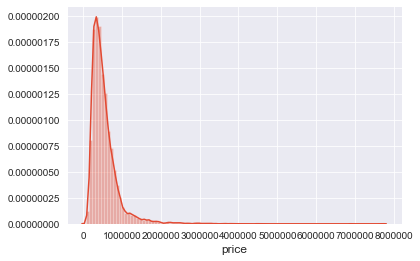

In [115]:
sns.set_style('darkgrid')
g = sns.distplot(df["price"], bins = 100, kde=True, norm_hist = True)


I restrict the x-values range:

Text(1102500.0, 1.6603308527278759e-06, 'Median: 450000.00')

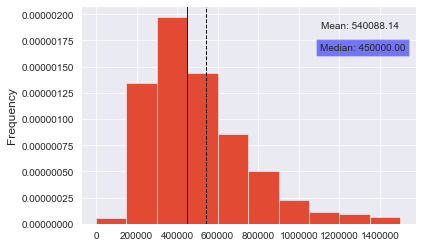

In [120]:
#distribution of prices of house
sns.set_style('darkgrid')
df.price.plot.hist(density = True, range=(0,1500000))

plt.axvline(df.price.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.price.mean()*2.05, max_ylim*0.9, 'Mean: {:.2f}'.format(df.price.mean()))

plt.axvline(df.price.median(), color='b', linewidth=1)
plt.text(df.price.median()*2.45, max_ylim*0.8, 'Median: {:.2f}'.format(df.price.median()), bbox=dict(facecolor='blue', alpha=0.5))

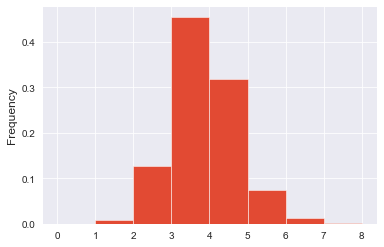

In [121]:
#distribution of no. of bedrooms in the house
sns.set_style('darkgrid')
df.bedrooms.plot.hist(density = True, range=(0,8), bins=8)

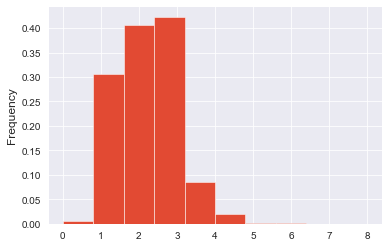

In [122]:
#distribution of no. of bathrooms in the house
df.bathrooms.plot.hist(density = True)

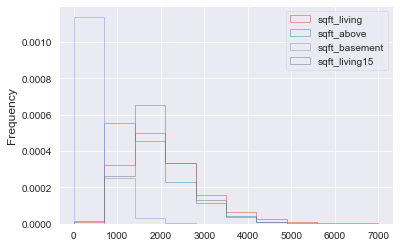

In [123]:
#distribution of sqft in the house and neighborhood
df.sqft_living.plot.hist(density = True, histtype = 'step', range=(0,7000))
df.sqft_above.plot.hist(density = True, histtype = 'step', range=(0,7000))
df.sqft_basement.plot.hist(density = True, histtype = 'step', range=(0,7000))
df.sqft_living15.plot.hist(density = True, histtype = 'step', range=(0,7000))
plt.legend()


In [124]:
mean_price_per_bedrooms = df.price.groupby(df.bedrooms).mean()

In [125]:
mean_price_per_bedrooms

bedrooms
0     4.095038e+05
1     3.176429e+05
2     4.013727e+05
3     4.662321e+05
4     6.354195e+05
5     7.865998e+05
6     8.255206e+05
7     9.511847e+05
8     1.105077e+06
9     8.939998e+05
10    8.193333e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

With more than 3 bedrooms, the price start increasing a lot

In [126]:
mean_price_per_bathrooms = df.price.groupby(df.bathrooms).mean()

In [127]:
mean_price_per_bathrooms

bathrooms
0.00    4.481600e+05
0.50    2.373750e+05
0.75    2.945209e+05
1.00    3.470412e+05
1.25    6.212167e+05
1.50    4.093222e+05
1.75    4.548961e+05
2.00    4.578897e+05
2.25    5.336768e+05
2.50    5.535965e+05
2.75    6.602304e+05
3.00    7.084152e+05
3.25    9.703398e+05
3.50    9.319331e+05
3.75    1.197217e+06
4.00    1.267709e+06
4.25    1.525774e+06
4.50    1.333620e+06
4.75    2.021304e+06
5.00    1.673492e+06
5.25    1.817177e+06
5.50    2.522300e+06
5.75    2.492500e+06
6.00    2.946833e+06
6.25    3.094000e+06
6.50    1.709445e+06
6.75    2.734000e+06
7.50    4.500000e+05
7.75    6.885000e+06
8.00    4.990000e+06
Name: price, dtype: float64

I can't find any particular trend.

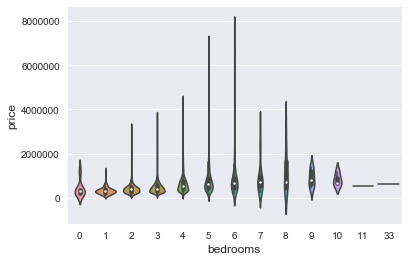

In [128]:
# violin plot: plot vs bedrooms
sns.violinplot(x='bedrooms',y='price',data=df)

(-1182447.137119572, 4500000)

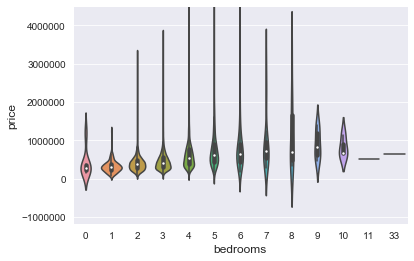

In [129]:
sns.violinplot(x='bedrooms',y='price',data=df)
#bottom, top = plt.ylim()  # return the current ylim
plt.ylim(top=4500000)   # set the ylim to bottom, top
#ylim(0, 2000000)     # set the ylim to bottom, top

Very high variability. It has sense since, fixed the number of bedrooms, the house's price depends also on dimension variables, condition and so on. In order to make an interesting visualization analysis I should take into account a combination of 3/4 covariates, however there are only continuous variables. Therefore from an aesthetic point of view it is not significant with this kind of dataset.

N.B.: Another possible approach could be splitting the dataset into smaller ones, e.g. grouped by different characteristics. But for lake of time and since this is not the goal of my work I won't do this kind of analysis.

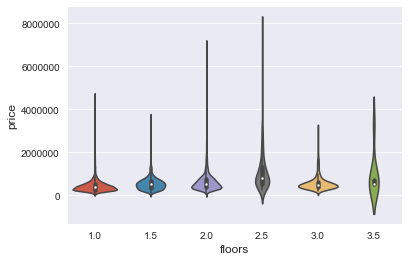

In [130]:
sns.violinplot(x='floors',y='price',data=df)

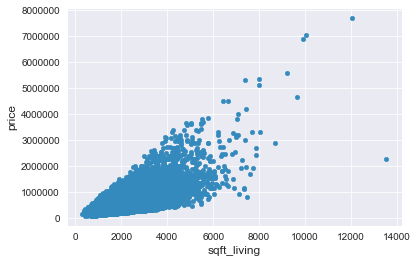

In [131]:
df.plot.scatter(x='sqft_living', y='price')

Positive linear relation

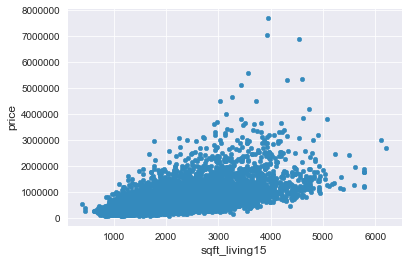

In [132]:
df.plot.scatter(x='sqft_living15', y='price')

(-306250.01131197007, 4000000)

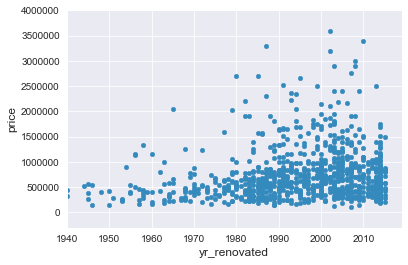

In [133]:
df.plot.scatter(x='yr_renovated', y='price')
plt.xlim(left=1940, right = 2019)
plt.ylim(top=4000000)
#no sense. I should use similar houses to compare them

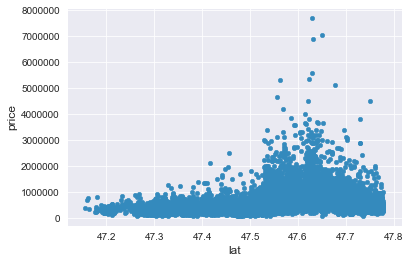

In [134]:
df.plot.scatter(x='lat', y='price')
# equilibrium 
# Seattle (47,6°)

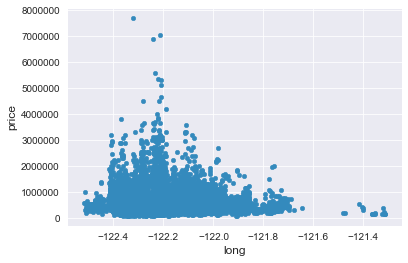

In [135]:
df.plot.scatter(x='long', y='price')
# Seattle (-122) -> the highest concentration of houses and moreover we find the most expensive ones

No particular trends/relations in the last plots

Text(0.5, 0.98, 'Lat x Long x Price')

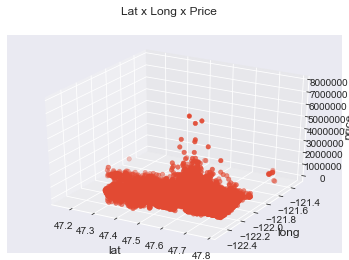

In [136]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('lat')
ax.set_ylabel('long')
ax.set_zlabel('price')

ax.scatter(df.lat, df.long, df.price)
plt.suptitle('Lat x Long x Price')

As I said before, with more than 2 dimensions, the plots are quite difficult to interpret.

In [137]:
def check_unique(dataframe,columns):
    
    if isinstance(columns,list):
        
        for i,col in enumerate(columns):
            
            print(f'\nColumn: {col}')
            print(dataframe[col].unique())
            
    else:
        print("Input columns must be a list")
        return None

In [138]:
check_unique(df,['bedrooms','bathrooms','yr_renovated','condition','waterfront','view'])



Column: bedrooms
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]

Column: bathrooms
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]

Column: yr_renovated
[   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964 1959 1960 1967 1965 1934 1944]

Column: condition
[3 5 4 1 2]

Column: waterfront
[0 1]

Column: view
[0 3 4 2 1]


In [139]:
# I decide to simplify the variables bedrooms and bathrooms:

In [140]:
data = pd.read_csv('data.csv', sep = ';')
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3980300371,142000,0,0,290,20875,1.0,0,0,1,LOW,290,0,1963,0,47.5308,-121.888,1620,22850
1,3421079032,75000,1,0,670,43377,1.0,0,0,3,LOW,670,0,1966,0,47.2638,-121.906,1160,42882
2,2420069251,262000,1,1,520,12981,1.0,0,0,5,LOW,520,0,1920,0,47.2082,-121.995,1340,12233
3,5702500050,280000,1,0,600,24501,1.0,0,0,2,LOW,600,0,1950,0,47.5316,-121.749,990,22549
4,7325600160,299000,1,1,560,12120,1.0,0,0,3,AVG,560,0,1967,0,47.6750,-121.854,1300,19207


In [141]:
data = data.reset_index()

In [142]:
check_unique(data,['bedrooms','bathrooms','yr_renovated','condition','waterfront','view'])



Column: bedrooms
['0' '1' '2' '3' '4' '>4']

Column: bathrooms
[0 1 2 3 4 5 7 6 8]

Column: yr_renovated
[   0 1980 1957 1993 2014 1995 1987 1989 1984 1983 2005 1977 1992 1971
 1945 2002 1950 2009 2007 1951 1999 1953 1969 1988 2008 2013 1940 1998
 1990 1964 1996 1975 2003 1960 1967 1973 2006 1997 1985 1965 1955 1934
 1978 2012 1944 1986 2004 2000 1994 1974 1968 1958 1970 1946 1991 1954
 2011 1981 1979 2010 1948 1962 1982 1963 2015 1976 2001 1959 1956 1972]

Column: condition
[1 3 5 2 4]

Column: waterfront
[0 1]

Column: view
[0 2 1 4 3]


In [143]:
data = data.drop('id',axis = 1)


([<matplotlib.axis.YTick at 0x20751153ec8>,
 <a list of 18 Text yticklabel objects>)

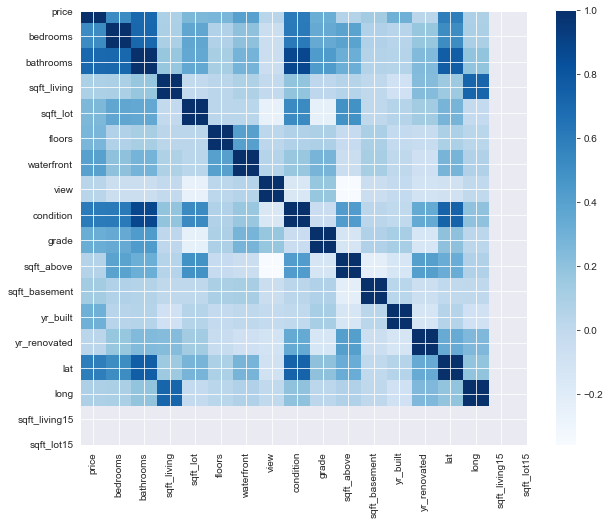

In [144]:
# Create a figure
fig = plt.figure(figsize=(10,8))

plt.imshow(data.drop('index',axis=1).corr(), cmap = plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(data.drop('index',axis=1).columns))]
plt.xticks(tick_marks, data.drop('index',axis=1).columns, rotation='vertical')
plt.yticks(tick_marks, data.drop('index',axis=1).columns)

The most correlated variables to *price* are: *bedrooms, bathrooms, waterfront, condition, lat* (latitude). The result is not surprising, however I can't understand why sqft_living is not highly correlated to price. I try to scale data and see if results change

In [145]:
mm_scaler = preprocessing.MinMaxScaler()
df_minmax = mm_scaler.fit_transform(df.drop(['index','id'], axis=1))

In [146]:
pd.DataFrame(df_minmax).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.571498,0.217608,0.161934,0.005742
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.908959,0.166113,0.222165,0.008027
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.936143,0.237542,0.399415,0.008513
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.586939,0.104651,0.165376,0.004996
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.741354,0.393688,0.241094,0.007871


([<matplotlib.axis.YTick at 0x207532fe888>,
 <a list of 18 Text yticklabel objects>)

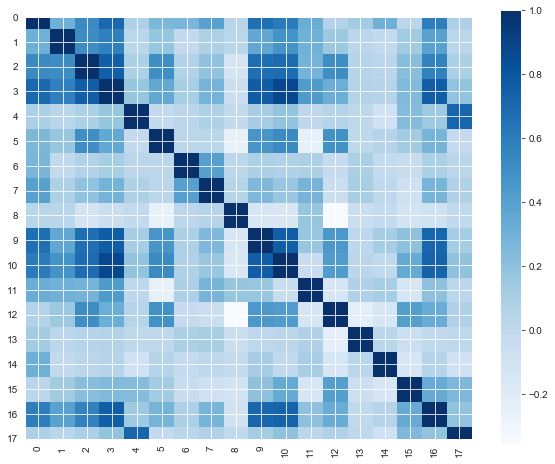

In [147]:
# Create a figure
fig = plt.figure(figsize=(10,8))

plt.imshow(pd.DataFrame(df_minmax).corr(), cmap = plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(pd.DataFrame(df_minmax).columns))]
plt.xticks(tick_marks, pd.DataFrame(df_minmax).columns, rotation='vertical')
plt.yticks(tick_marks, pd.DataFrame(df_minmax).columns)

And indeed *sqft_living* starts being highly correlated to *price*!

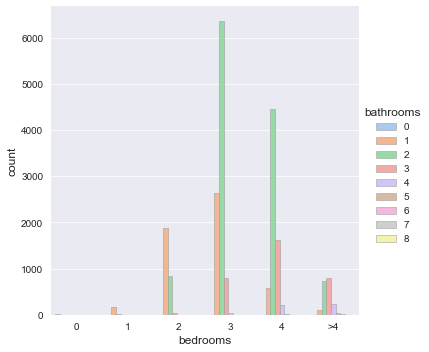

In [148]:
# no. of bathrooms per house, grouped by no. of bedrooms
sns.catplot(x="bedrooms", hue="bathrooms", kind="count",
            palette="pastel", edgecolor=".6",
            data=data);

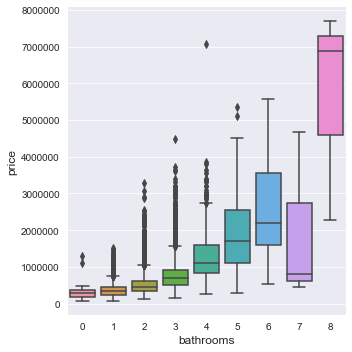

In [149]:
#boxplot: price vs bathrooms
sns.catplot(x="bathrooms", y="price", kind="box", data=data);

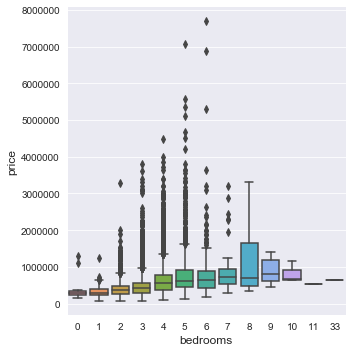

In [150]:
sns.catplot(x="bedrooms", y="price", kind="box", data=df);
#plt.ylim(top=1000000)

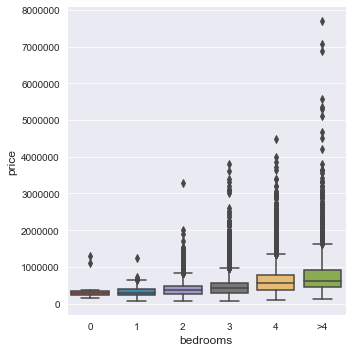

In [151]:
sns.catplot(x="bedrooms", y="price", kind="box", data=data);
#plt.ylim(top=1000000)

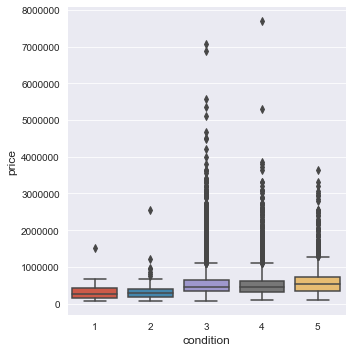

In [153]:
sns.catplot(x="condition", y="price", kind="box", data=data)
#condition alone has no sense; I should again group house by similarities

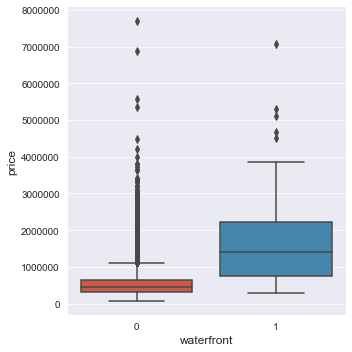

In [154]:
sns.catplot(x="waterfront", y="price", kind="box", data=data);

I don't find really interesting the visualization part for my analyses. I just made some plots in order to have a better view of the data, however I don't want to waste time to give specific comments.

Just a consideration: a huge number of __outliers__ is present, however I decide to keep them in such a way my model(s) can capture them and perform well in all the cases.

## MODELING (and evaluating) PART

I try to do a __clustering analysis__ before solving my work's goal

In [155]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.scatter(df.long, df.lat, marker='.', alpha=0.3)
    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    df = df.loc[:, ['long', 'lat']]
    
    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    model = KMeans(n_clusters=3)
    model.fit(df)
    KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
    
    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='*', c='blue', alpha=0.5, linewidths=3, s=169)
    

[[-122.30995   47.64657]
 [-122.03629   47.61185]
 [-122.20201   47.3899 ]]


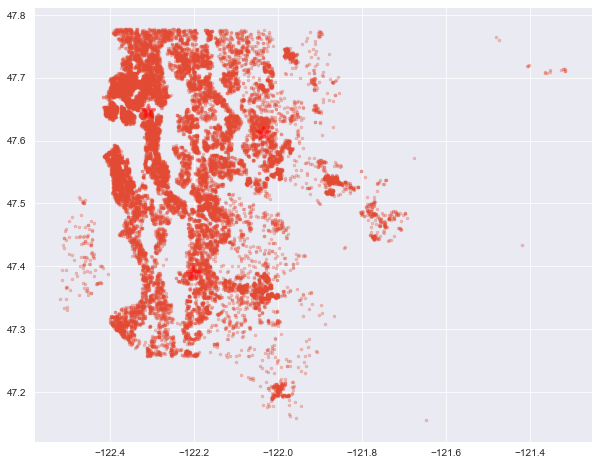

In [156]:
# Try doKMeans function defined above with the first dataset "df"
doKMeans(data)

I do not find it very interesting, at least for my analysis. Maybe for a more general study It can be interesting to deeper analyse the clusters, also according to other variables

In [157]:
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

I try also with a hierarchical clustering, through a dendogram

In [158]:
X = df.loc[:,['bedrooms','bathrooms','sqft_living','floors','sqft_above','sqft_basement']].copy()

In [159]:
X = df.loc[:,['bedrooms','bathrooms','sqft_living','floors','sqft_above','sqft_basement']].copy()
x_train, x_test, y_train, y_test = train_test_split(X, df.loc[:,'price'], test_size = 0.33, random_state=1)

In [160]:
merges = linkage(x_train, method = 'single')
print('there have been %d merges'%(merges.shape[0]))

there have been 14479 merges


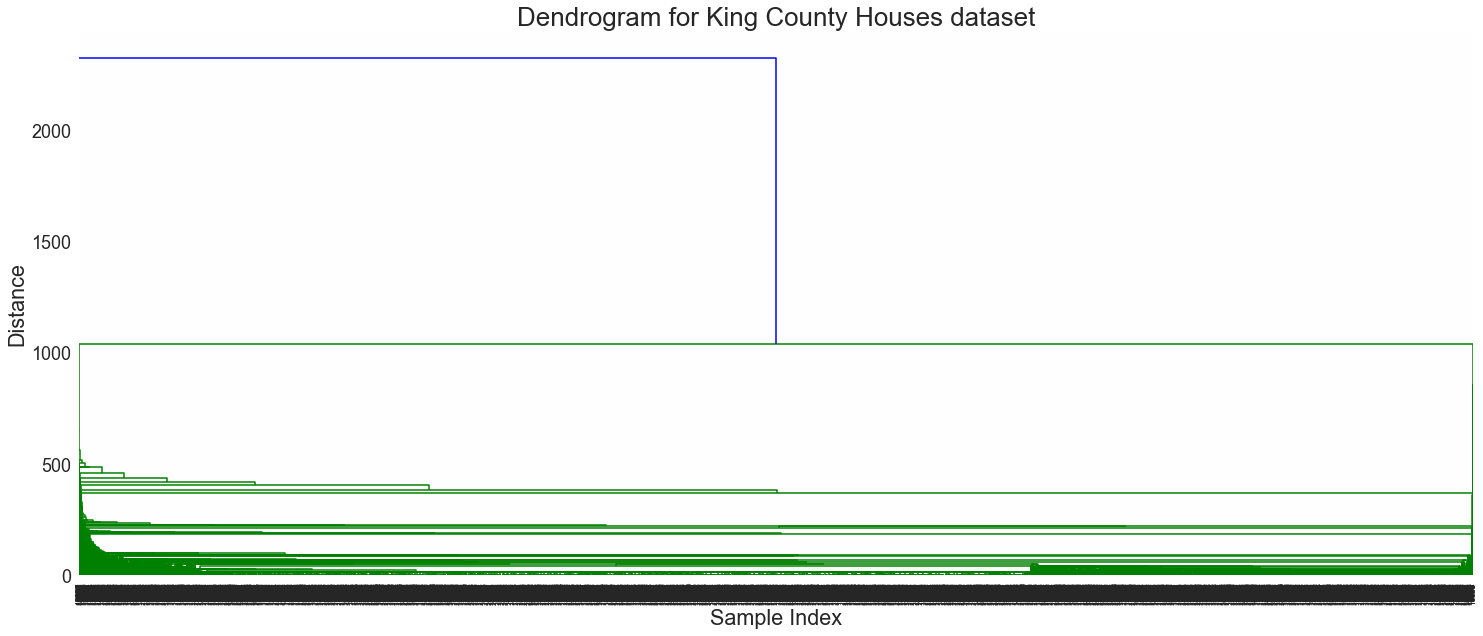

In [161]:
plt.figure(figsize=(25, 10))
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(merges, 
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('Dendrogram for King County Houses dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

It's quite impossible to give a significant interpretation of the dendogram. That's why I decide to now concentrate only on the predictive methods.


In [162]:
matplotlib.style.use('ggplot') # Look Pretty

I split the dataset into __training set__ (67%) and __test set__.

In [96]:
X = df.loc[:,'bedrooms':].copy()
y=df.loc[:,'price'].copy()
x_train, x_test, y_train, y_test = train_test_split(X, df.loc[:,'price'], test_size = 0.33, random_state=1)

I apply a *linear regression* model, considering all the covariates

In [98]:
def r2_cv(model, X_train, y, random_state=12345678):
    r2= cross_val_score(model, X_train, y, scoring="r2", cv =KFold(10, shuffle=True, random_state=random_state))
    return(r2)

def rmse_cv(model, X_train, y, random_state=12345678):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv =KFold(10, shuffle=True, random_state=random_state)))
    return(rmse)

In [99]:
model_simple = LinearRegression()
model_simple.fit(x_train, pd.DataFrame(y_train))
yp = model_simple.predict(x_train)

# compute R2 for train and using crossvalidation
r2_simple_train = r2_score(y_train,yp)
r2_xval_simple =  r2_cv(model_simple, x_train, pd.DataFrame(y_train))

# compute RMSE for train and using crossvalidation
rmse_simple_train = mean_squared_error(pd.DataFrame(y_train),yp,multioutput='raw_values')
rmse_xval_simple =  rmse_cv(model_simple, x_train, pd.DataFrame(y_train))

print("Linear Regression")
print("==================================================")
print("\t                  Train R2=%.3f"%(r2_simple_train))
print("\t10-fold Crossvalidation R2=%.3f"%(r2_xval_simple.mean()))
print("\t                  Train RMSE=%.3f"%(rmse_simple_train))
print("\t10-fold Crossvalidation RMSE=%.3f"%(rmse_xval_simple.mean()))

Linear Regression
	                  Train R2=0.516
	10-fold Crossvalidation R2=0.512
	                  Train RMSE=61510948188.796
	10-fold Crossvalidation RMSE=247695.086


An R2 of 0.7 is a very good result when considering a real big dataset with a lot of variables. Moreover, recalling that the target variable *price* is on billions, a 10-fold CV RMSE = 195k is positive.

Let's look at the intercept and at the coefficients:

In [166]:
[model_simple.intercept_, model_simple.coef_]

[array([-37293208.62282]),
 array([[ -30594.71612,   40087.46479,     105.78569,       0.08439,
            2939.82438,  564606.73604,   49040.22694,   31075.19053,
           96541.63892,      69.9386 ,      35.84708,   -2400.60359,
              23.68606,  573652.43992, -114803.53413,      24.37479,
              -0.31186]])]

We have a very negative intercept;
negative coefficients: *bedrooms* (weird result), *long, sqrt_basement*;
highly positive ones: *bathrooms, waterfront, view, condition, grade, lat* (expected results!).
Maybe *sqft_lot, yr_built, yr_renovated* and *sqft_living15, sqft_lot15* can be discarded from the model.

1. I try firstly to delete the intercept:

In [167]:
model_simple = LinearRegression(fit_intercept = False)
model_simple.fit(x_train, pd.DataFrame(y_train))
yp = model_simple.predict(x_train)

# compute R2 for train and using crossvalidation
r2_simple_train = r2_score(y_train,yp)
r2_xval_simple =  r2_cv(model_simple, x_train, pd.DataFrame(y_train))

# compute RMSE for train and using crossvalidation
rmse_simple_train = mean_squared_error(pd.DataFrame(y_train),yp,multioutput='raw_values')
rmse_xval_simple =  rmse_cv(model_simple, x_train, pd.DataFrame(y_train))

print("Linear Regression")
print("==================================================")
print("\t                  Train R2=%.3f"%(r2_simple_train))
print("\t10-fold Crossvalidation R2=%.3f"%(r2_xval_simple.mean()))
print("\t                  Train RMSE=%.3f"%(rmse_simple_train))
print("\t10-fold Crossvalidation RMSE=%.3f"%(rmse_xval_simple.mean()))

Linear Regression
	                  Train R2=0.692
	10-fold Crossvalidation R2=0.689
	                  Train RMSE=39160634075.678
	10-fold Crossvalidation RMSE=197904.513


Similar result, a little bit worse. But let's have a look to the coefficients:

In [168]:
x_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [169]:
model_simple.coef_

array([[-32078.40601,  43784.78071,    105.63616,      0.01064,
         18540.90006, 569721.4844 ,  51597.40751,  24862.59417,
        106880.99017,     58.20202,     47.43413,  -3175.8865 ,
            15.47056, 500441.53878, 149618.44736,      9.12397,
            -0.47084]])

No changements, except for *long*! By looking at the map of King County (that you can find in the .zip folder) I think that by augmenting the longitudine, we go far away from the bigger cities (in particular from Seattle), so the price should in principle (logically) decrease. This is not the case. Therefore I'll keep the intercept.

2. I drop some covariates:

In [170]:
x_train = x_train.drop(['sqft_lot','floors','yr_built','yr_renovated','sqft_lot15'], axis = 1)

I re-fit the linear regression:

In [171]:
model_simple = LinearRegression()
model_simple.fit(x_train, pd.DataFrame(y_train))
yp = model_simple.predict(x_train)

# compute R2 for train and using crossvalidation
r2_simple_train = r2_score(y_train,yp)
r2_xval_simple =  r2_cv(model_simple, x_train, pd.DataFrame(y_train))

# compute RMSE for train and using crossvalidation
rmse_simple_train = mean_squared_error(pd.DataFrame(y_train),yp,multioutput='raw_values')
rmse_xval_simple =  rmse_cv(model_simple, x_train, pd.DataFrame(y_train))

print("Linear Regression")
print("==================================================")
print("\t                  Train R2=%.3f"%(r2_simple_train))
print("\t10-fold Crossvalidation R2=%.3f"%(r2_xval_simple.mean()))
print("\t                  Train RMSE=%.3f"%(rmse_simple_train))
print("\t10-fold Crossvalidation RMSE=%.3f"%(rmse_xval_simple.mean()))

Linear Regression
	                  Train R2=0.678
	10-fold Crossvalidation R2=0.675
	                  Train RMSE=40934418964.174
	10-fold Crossvalidation RMSE=202225.761


In [172]:
x_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long',
       'sqft_living15'],
      dtype='object')

In [173]:
model_simple.coef_

array([[ -26531.97642,   -1315.95927,     122.24147,  571578.97806,
          57417.76282,   54450.66393,   77066.92921,      71.8873 ,
             50.35417,  650688.92083, -253846.82984,      26.00757]])

Worse results, both in terms of R2 and RMSE, and in terms of coefficients. I don't really like negative coeff. for *bedrooms, bathrooms and latitude*.
I think the first model, with all the variables, is the best one among the three.

In [174]:
X = df.loc[:,'bedrooms':].copy()
y=df.loc[:,'price'].copy()
x_train, x_test, y_train, y_test = train_test_split(X, df.loc[:,'price'], test_size = 0.33, random_state=1)

In [175]:
model_simple = LinearRegression()
model_simple.fit(x_train, pd.DataFrame(y_train))
yp = model_simple.predict(x_train)

# compute R2 for train and using crossvalidation
r2_simple_train = r2_score(y_train,yp)
r2_xval_simple =  r2_cv(model_simple, x_train, pd.DataFrame(y_train))

# compute RMSE for train and using crossvalidation
rmse_simple_train = mean_squared_error(pd.DataFrame(y_train),yp,multioutput='raw_values')
rmse_xval_simple =  rmse_cv(model_simple, x_train, pd.DataFrame(y_train))

print("Linear Regression")
print("==================================================")
print("\t                  Train R2=%.3f"%(r2_simple_train))
print("\t10-fold Crossvalidation R2=%.3f"%(r2_xval_simple.mean()))
print("\t                  Train RMSE=%.3f"%(rmse_simple_train))
print("\t10-fold Crossvalidation RMSE=%.3f"%(rmse_xval_simple.mean()))

Linear Regression
	                  Train R2=0.700
	10-fold Crossvalidation R2=0.697
	                  Train RMSE=38121324333.667
	10-fold Crossvalidation RMSE=195246.792


Let's see the predicted values of __price__

In [176]:
y_pred = model_simple.predict(x_train)
#y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)

In [177]:
y_pred

array([[ 493397.92018],
       [ 341919.78978],
       [ 418801.07578],
       ...,
       [ 495716.32416],
       [ 588092.29772],
       [1114990.36103]])

I'll re-use it to compare them with the test_set - prices and to compute performance parameters.

I found another library that computes linear regression. I try it to see if results change:

In [178]:
X = x_train
y = y_train
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              8723.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):                        0.00
Time:                        11:46:39   Log-Likelihood:                     -1.9714e+05
No. Observations:               14480   AIC:                                  3.943e+05
Df Residuals:                   14464   BIC:                                  3.944e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.208e+04   2234.402    -14.357      0.000   -3.65e+04   -2.77e+04
bathrooms      4.378e+04   3908.918     11.201      0.000    3.61e+04    5.14e+04
sqft_living     105.6362      2.755     38.343      0.000     100.236     111.036
sqft_lot          0.0106      0.054      0.199      0.843      -0.094       0.116
floors         1.854e+04   4237.583      4.375      0.000    1.02e+04    2.68e+04
waterfront     5.697e+05   2.08e+04     27.382      0.000    5.29e+05    6.11e+05
view            5.16e+04   2552.380     20.215      0.000    4.66e+04    5.66e+04
condition      2.486e+04   2797.984      8.886      0.000    1.94e+04    3.03e+04
grade          1.069e+05   2539.624     42.085      0.000    1.02e+05    1.12e+05
sqft_above       58.2020      2.664     21.849      0.000      52.980      63.424
sqft_basement    47.4341      3.145     15.080      0.000      41.269      53.600
yr_built      -3175.8865     77.025    -41.232      0.000   -3326.866   -3024.907
yr_renovated     15.4706      4.395      3.520      0.000       6.855      24.086
lat            5.004e+05    1.2e+04     41.763      0.000    4.77e+05    5.24e+05
long           1.496e+05   4914.206     30.446      0.000     1.4e+05    1.59e+05
sqft_living15     9.1240      4.077      2.238      0.025       1.132      17.116
sqft_lot15       -0.4708      0.084     -5.573      0.000      -0.636      -0.305
==============================================================================
Omnibus:                    10578.590   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           496140.929
Skew:                           3.017   Prob(JB):                         0.00
Kurtosis:                      31.034   Cond. No.                     7.89e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.45e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Results (r2, F-statistics and so on) are too optimistic, too good. That's a problem of __overfitting__!

First,I delete the variables that are not significant to the model

In [179]:
X = x_train.drop(['sqft_lot','sqft_living15'],axis=1)
y = y_train
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              9966.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):                        0.00
Time:                        11:46:39   Log-Likelihood:                     -1.9714e+05
No. Observations:               14480   AIC:                                  3.943e+05
Df Residuals:                   14466   BIC:                                  3.944e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       -3.21e+04   2233.986    -14.370      0.000   -3.65e+04   -2.77e+04
bathrooms      4.342e+04   3905.668     11.118      0.000    3.58e+04    5.11e+04
sqft_living     107.7739      2.584     41.701      0.000     102.708     112.840
floors         1.695e+04   4176.083      4.058      0.000    8759.387    2.51e+04
waterfront     5.681e+05   2.08e+04     27.317      0.000    5.27e+05    6.09e+05
view           5.238e+04   2528.438     20.717      0.000    4.74e+04    5.73e+04
condition      2.482e+04   2798.155      8.869      0.000    1.93e+04    3.03e+04
grade          1.084e+05   2450.887     44.217      0.000    1.04e+05    1.13e+05
sqft_above       60.4355      2.468     24.487      0.000      55.598      65.273
sqft_basement    47.3384      3.144     15.055      0.000      41.175      53.502
yr_built      -3161.7657     76.766    -41.187      0.000   -3312.237   -3011.294
yr_renovated     15.2515      4.395      3.470      0.001       6.637      23.866
lat            5.032e+05   1.19e+04     42.224      0.000     4.8e+05    5.27e+05
long           1.509e+05   4879.199     30.929      0.000    1.41e+05     1.6e+05
sqft_lot15       -0.4546      0.061     -7.461      0.000      -0.574      -0.335
==============================================================================
Omnibus:                    10522.992   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           485392.867
Skew:                           2.998   Prob(JB):                         0.00
Kurtosis:                      30.723   Cond. No.                     3.00e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.53e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Of course, the problem is not solved. I try to scale variables

In [180]:
scaler = StandardScaler()

In [181]:
train_scaled = scaler.fit_transform(x_train)

In [182]:
test_scaled = scaler.transform(x_test)

In [183]:
X = train_scaled
y = y_train
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.213
Model:                            OLS   Adj. R-squared (uncentered):              0.212
Method:                 Least Squares   F-statistic:                              245.2
Date:                Sun, 03 Nov 2019   Prob (F-statistic):                        0.00
Time:                        11:46:40   Log-Likelihood:                     -2.1253e+05
No. Observations:               14480   AIC:                                  4.251e+05
Df Residuals:                   14464   BIC:                                  4.252e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.874e+04   6078.067     -4.728      0.000   -4.07e+04   -1.68e+04
x2          3.064e+04   8656.378      3.539      0.000    1.37e+04    4.76e+04
x3          7.813e+04   5528.789     14.132      0.000    6.73e+04     8.9e+04
x4          3695.4734   6808.010      0.543      0.587   -9649.098     1.7e+04
x5          1592.3039   6759.432      0.236      0.814   -1.17e+04    1.48e+04
x6          4.902e+04   5229.323      9.375      0.000    3.88e+04    5.93e+04
x7          3.743e+04   5645.137      6.630      0.000    2.64e+04    4.85e+04
x8          2.023e+04   5306.761      3.813      0.000    9831.742    3.06e+04
x9          1.129e+05   8780.537     12.859      0.000    9.57e+04     1.3e+05
x10         7.327e+04   5884.123     12.452      0.000    6.17e+04    8.48e+04
x11         2.439e+04   5424.361      4.496      0.000    1.38e+04     3.5e+04
x12        -7.061e+04   7372.285     -9.578      0.000   -8.51e+04   -5.62e+04
x13         9458.6401   5103.387      1.853      0.064    -544.652    1.95e+04
x14         7.969e+04   5046.759     15.790      0.000    6.98e+04    8.96e+04
x15        -1.615e+04   5848.723     -2.762      0.006   -2.76e+04   -4687.626
x16         1.655e+04   8157.643      2.029      0.042     560.304    3.25e+04
x17        -8738.3700   6883.803     -1.269      0.204   -2.22e+04    4754.765
==============================================================================
Omnibus:                    10492.216   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           497884.658
Skew:                           2.974   Prob(JB):                         0.00
Kurtosis:                      31.104   Cond. No.                     1.11e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.93e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Results become worse! The problem was not the scale. By reading the warning [2] I think the issue is related to the fact that the covariates are linearly dependent, and that's reasonable. For instance, all the *sqft-* variables are linked to each others.
So, I re-fit the OLS model with the initial training dataset by removing some variables.

In [184]:
x_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [185]:
x_train = x_train.drop(['sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_lot15'], axis = 1)

In [186]:
X = x_train
y = y_train
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          1.089e+04
Date:                Sun, 03 Nov 2019   Prob (F-statistic):                        0.00
Time:                        11:46:41   Log-Likelihood:                     -1.9813e+05
No. Observations:               14480   AIC:                                  3.963e+05
Df Residuals:                   14469   BIC:                                  3.964e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.593e+04   2378.295    -10.903      0.000   -3.06e+04   -2.13e+04
bathrooms     -8125.0786   3873.702     -2.097      0.036   -1.57e+04    -532.126
sqft_living     185.6099      4.229     43.889      0.000     177.320     193.899
floors        -1.116e+04   4009.351     -2.783      0.005    -1.9e+04   -3298.708
waterfront     5.766e+05   2.22e+04     25.944      0.000    5.33e+05     6.2e+05
view           6.918e+04   2651.002     26.096      0.000     6.4e+04    7.44e+04
condition      5.647e+04   2839.982     19.884      0.000    5.09e+04     6.2e+04
grade          8.996e+04   2664.855     33.758      0.000    8.47e+04    9.52e+04
lat            5.539e+05   1.27e+04     43.474      0.000    5.29e+05    5.79e+05
long           2.205e+05   4945.589     44.581      0.000    2.11e+05     2.3e+05
sqft_living15   -13.5594      4.233     -3.203      0.001     -21.856      -5.262
==============================================================================
Omnibus:                     9966.669   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           340425.478
Skew:                           2.859   Prob(JB):                         0.00
Kurtosis:                      26.055   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I did not fit multicollinearity. I compute the correlation matrix to have a deeper look:

In [187]:
x_train.corr()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,lat,long,sqft_living15
bedrooms,1.000000,0.501256,0.570885,0.164988,-0.016536,0.075076,0.033442,0.344932,-0.001831,0.131270,0.383734
bathrooms,0.501256,1.000000,0.750555,0.499939,0.061093,0.180604,-0.130081,0.660528,0.028973,0.222893,0.560307
sqft_living,0.570885,0.750555,1.000000,0.348867,0.096629,0.271425,-0.059932,0.760689,0.052297,0.243468,0.753358
floors,0.164988,0.499939,0.348867,1.000000,0.022373,0.022084,-0.269408,0.454943,0.047919,0.121087,0.272325
waterfront,-0.016536,0.061093,0.096629,0.022373,1.000000,0.401803,0.022974,0.080380,-0.011612,-0.042667,0.077470
view,0.075076,0.180604,0.271425,0.022084,0.401803,1.000000,0.041561,0.244510,0.003277,-0.076672,0.266918
condition,0.033442,-0.130081,-0.059932,-0.269408,0.022974,0.041561,1.000000,-0.149229,-0.021251,-0.107680,-0.096954
grade,0.344932,0.660528,0.760689,0.454943,0.080380,0.244510,-0.149229,1.000000,0.116107,0.201622,0.711407
lat,-0.001831,0.028973,0.052297,0.047919,-0.011612,0.003277,-0.021251,0.116107,1.000000,-0.139885,0.054474
long,0.131270,0.222893,0.243468,0.121087,-0.042667,-0.076672,-0.107680,0.201622,-0.139885,1.000000,0.340291


I delete *bathrooms*

In [188]:
X = x_train.drop('bathrooms', axis = 1)
y = y_train
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          1.198e+04
Date:                Sun, 03 Nov 2019   Prob (F-statistic):                        0.00
Time:                        11:46:41   Log-Likelihood:                     -1.9813e+05
No. Observations:               14480   AIC:                                  3.963e+05
Df Residuals:                   14470   BIC:                                  3.964e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.685e+04   2338.170    -11.481      0.000   -3.14e+04   -2.23e+04
sqft_living     182.0906      3.882     46.901      0.000     174.481     189.701
floors        -1.391e+04   3789.735     -3.669      0.000   -2.13e+04   -6476.967
waterfront     5.766e+05   2.22e+04     25.944      0.000    5.33e+05     6.2e+05
view           6.915e+04   2651.261     26.081      0.000    6.39e+04    7.43e+04
condition      5.669e+04   2838.416     19.972      0.000    5.11e+04    6.23e+04
grade          8.918e+04   2638.971     33.793      0.000     8.4e+04    9.44e+04
lat            5.543e+05   1.27e+04     43.507      0.000    5.29e+05    5.79e+05
long           2.206e+05   4945.665     44.611      0.000    2.11e+05     2.3e+05
sqft_living15   -13.0923      4.227     -3.097      0.002     -21.379      -4.806
==============================================================================
Omnibus:                     9973.243   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           340811.507
Skew:                           2.862   Prob(JB):                         0.00
Kurtosis:                      26.068   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Nothing to do: the problem is still occurring. I keep as model the first one fitted, with the first library

In [191]:
## https://medium.com/@srnghn/machine-learning-trying-to-predict-a-numerical-value-8aafb9ad4d36

Now I try to fit some other predictive methods and then I'll compare them.

To be more rigorous I should check gaussianity before applying linear regression. For now, I transform only the target variable:

In [192]:
# Let's import the dataset and let's have a look at the data
df = pd.read_csv('kc_house_data.csv', sep = ',')
df.price = np.log1p(df['price'])

In [193]:
## DECISION TREE (https://nbviewer.jupyter.org/github/srnghn/ml_example_notebooks/blob/master/Predicting%20Yacht%20Resistance%20with%20Decision%20Trees%20%26%20Random%20Forests.ipynb)

Notice, moreover, that with a multidimensional dataset it's really hard (and useless too) to give a graphical representation.

# 1. DECISION TREE

*Decision trees* learn how to best split the dataset into separate branches, allowing it to learn <u>non-linear relationships</u>.

__Random Forests__ (RF) and __Gradient Boosted Trees__ (GBT) are two algorithms that build many individual trees, pooling their predictions. As they use a collection of results to make a final decision, they are referred to as “Ensemble techniques”.

__Pros__

    a. A single decision tree is fast to train
    b. Robust to noise and missing values
    c. RF performs very well “out-of-the-box”

__Cons__

    a. Single decision trees are prone to overfitting (which is where ensembles come in!)
    b. Complex trees are hard to interpret

In [194]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['date','id','price','zipcode','sqft_lot','sqft_lot15','yr_built','yr_renovated'],axis=1), df.loc[:,'price'], test_size = 0.33, random_state=1)

In [195]:
scaler = StandardScaler()

In [196]:
train_scaled = scaler.fit_transform(x_train)

In [197]:
test_scaled = scaler.transform(x_test)

I fit the model

In [198]:
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

In [199]:
tree_model.fit(train_scaled, y_train)
rf_model.fit(train_scaled, y_train)

C:\Users\emanuele.bolognini\anac\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

To evaluate the model I compute MSE, MAE

In [202]:
tree_mse = mean_squared_error(y_train, tree_model.predict(train_scaled))
tree_mae = mean_absolute_error(y_train, tree_model.predict(train_scaled))
rf_mse = mean_squared_error(y_train, rf_model.predict(train_scaled))
rf_mae = mean_absolute_error(y_train, rf_model.predict(train_scaled))

In [203]:
print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", math.sqrt(tree_mse))
print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", math.sqrt(rf_mse))

Decision Tree training mse =  0.0005797258838839576  & mae =  0.002228586430838349  & rmse =  0.024077497458912907
Random Forest training mse =  0.006791692181775457  & mae =  0.0552710381387648  & rmse =  0.082411723569984


In [204]:
tree_test_mse = mean_squared_error(y_test, tree_model.predict(test_scaled))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(test_scaled))
rf_test_mse = mean_squared_error(y_test, rf_model.predict(test_scaled))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(test_scaled))

In [205]:
print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", math.sqrt(tree_test_mse))
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", math.sqrt(rf_test_mse))

Decision Tree test mse =  0.06551378138076182  & mae =  0.18244698230864148  & rmse =  0.25595660058057074
Random Forest test mse =  0.037358207559094345  & mae =  0.13777553247236926  & rmse =  0.19328271407214445


Results seem to be very good, but I need to compare it with those of the other methods!

For sure, RF performs better with test set.

# 2. Neural Networks

*Neural networks* can learn complex patterns using layers of neurons (An artificial neuron is a mathematical function. It takes one or more inputs that are multiplied by values called ‘weights’ and added together. This value is then passed to a non-linear function, referred to as an ‘activation function’, which becomes the output) which mathematically transform the data. The layers between the input and output are referred to as “hidden layers”. A neural network can learn relationships between the features that other algorithms cannot easily discover.

__Pros__

    a. Extremely powerful/state-of-the-art for many domains (e.g. computer vision, speech recognition)
    b. Can learn even very complex relationships
    c. Hidden layers reduce need for feature engineering (less need to understand underlying data)

__Cons__

    a. Require a very large amount of data!
    b. Prone to overfitting
    c. Long training time
    d. Requires significant computing power for large datasets (computationally expensive)
    e. Model is a “black box”, unexplainable

In [206]:
nn_model = MLPClassifier()

In [207]:
x = pd.DataFrame(y_train)

In [208]:
nn_model.fit(x_train, y_train.astype('int'))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [209]:
accuracy_score(y_test.astype('int'), nn_model.predict(test_scaled))

0.4022150567783541

In [210]:
nn_mse = mean_squared_error(y_train, nn_model.predict(train_scaled))
nn_mae = mean_absolute_error(y_train, nn_model.predict(train_scaled))
print("Neural Network training mse = ",nn_mse," & mae = ",nn_mae," & rmse = ", math.sqrt(nn_mse))


Neural Network training mse =  1.3474441877885432  & mae =  0.961507101175871  & rmse =  1.1607946363541413


In [211]:
nn_test_mse = mean_squared_error(y_test, nn_model.predict(test_scaled))
nn_test_mae = mean_absolute_error(y_test, nn_model.predict(test_scaled))
print("N.N. test mse = ",nn_test_mse," & mae = ",nn_test_mae," & rmse = ", math.sqrt(nn_test_mse))

N.N. test mse =  1.3677400123051329  & mae =  0.9666747141590983  & rmse =  1.1695041737014593


Worse than RF!

# 3. K-Nearest Neighbors

__K-Nearest Neighbors__ (KNN) makes a prediction for a new observation by searching for the most similar training observations and pooling their values

__Pros__

    a. Simple
    b. Powerful
    c. No training involved

__Cons__

    a. Expensive & slow to predict new instances
    b. Performs poorly on high dimensional datasets

In [212]:
# https://nbviewer.jupyter.org/github/srnghn/ml_example_notebooks/blob/master/Predicting%20Yacht%20Resistance%20with%20K%20Nearest%20Neighbors.ipynb

In [213]:
model = KNeighborsRegressor()

model.fit(train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [216]:
mse = mean_squared_error(y_train, model.predict(train_scaled))
mae = mean_absolute_error(y_train, model.predict(train_scaled))

print("TRAIN (KNN): mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))

knn_test_mse = mean_squared_error(y_test, model.predict(test_scaled))
knn_test_mae = mean_absolute_error(y_test, model.predict(test_scaled))
print("TEST (KNN): mse = ",knn_test_mse," & mae = ",knn_test_mae," & rmse = ", sqrt(knn_test_mse))

TRAIN (KNN): mse =  0.03213891719009602  & mae =  0.13051799467203515  & rmse =  0.17927330306014896
TEST (KNN): mse =  0.05164288849718758  & mae =  0.16386788934457144  & rmse =  0.2272507172644073


Better than NN but the best one, up to now, remains RF.

# 4. Linear Regression

*Linear regression* attempts to fit a straight hyperplane to your dataset that is closest to all data points. It is most suitable when there are linear relationships between the variables in the dataset.

__Pros__

    Quick to compute and can be updated easily with new data
    Relatively easy to understand and explain

<u>Regularization techniques</u> (Lasso, Ridge regression) can be used to prevent overfitting

__Cons__

    Unable to learn complex relationships
    Difficult to capture non-linear relationships (without first transforming data which can be complicated)

I fit again the LR but with the transformed target variable and with the scaled x_train

In [217]:
model = LinearRegression()

In [218]:
model.fit(train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
lr_mse = mean_squared_error(y_train, model.predict(train_scaled))
lr_mae = mean_absolute_error(y_train, model.predict(train_scaled))

In [220]:
print("TRAIN (LR): mse = ",lr_mse," & mae = ",lr_mae," & rmse = ", sqrt(lr_mse))

TRAIN (LR): mse =  0.06960092031594882  & mae =  0.20566623232498094  & rmse =  0.26381986338399316


In [222]:
lr_test_mse = mean_squared_error(y_test, model.predict(test_scaled))
lr_test_mae = mean_absolute_error(y_test, model.predict(test_scaled))
print("mse = ",lr_test_mse," & mae = ",lr_test_mae," & rmse = ", sqrt(lr_test_mse))

mse =  0.07021593187524974  & mae =  0.2057656099714485  & rmse =  0.2649828897782831


## Models comparison (Evaluation)

In [223]:
MSE = [tree_test_mse, rf_test_mse, nn_test_mse, knn_test_mse, lr_test_mse]
MAE = [tree_test_mae, rf_test_mae, nn_test_mae, knn_test_mae, lr_test_mae]
RMSE = [sqrt(tree_test_mse), sqrt(rf_test_mse), sqrt(nn_test_mse), sqrt(knn_test_mse), sqrt(lr_test_mse)]

In [224]:
MSE = pd.DataFrame(MSE)
MSE

,0
0,0.065514
1,0.037358
2,1.367740
3,0.051643
4,0.070216


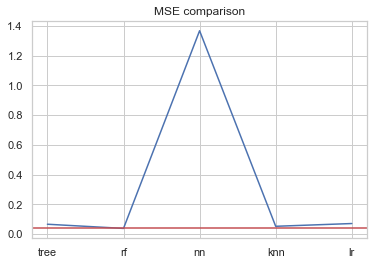

In [243]:
sns.set(style="whitegrid")
plt.plot(['tree','rf','nn','knn','lr'],MSE)
matplotlib.pyplot.title('MSE comparison')

plt.axhline(y=float(pd.DataFrame(MSE).min()), color='r', linestyle='-')

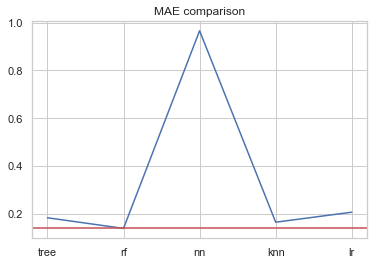

In [242]:
sns.set(style="whitegrid")
plt.plot(['tree','rf','nn','knn','lr'],MAE)
matplotlib.pyplot.title('MAE comparison')
plt.axhline(y=float(pd.DataFrame(MAE).min()), color='r', linestyle='-')

IT SEEMS CLEAR THAT THE BEST MODEL TO PREDICT THE HOUSES __PRICES__ IS THE <u> *RANDOM FOREST* </u>

However, we can notice that also the simple linear regression is quite good. That's why I try to apply a __regularization__. Maybe it can solve some overfitting problems and MSE and/or MAE can improve.

In particular I fit *Ridge* and *Lasso* regressions.

In [244]:
#model_simple = LinearRegression()
#model_simple.fit(X_train, y)
yp = model.predict(x_train)

# compute R2 using crossvalidation

r2_xval_simple =  r2_cv(model, x_train, y_train)

print("Linear Regression")
print("==================================================")
print("\t10-fold Crossvalidation R2=%.3f"%(r2_xval_simple.mean()))

Linear Regression
	10-fold Crossvalidation R2=0.746


## a. Ridge Regression (L2)

We now try ridge regression (L_2) and for this purpose we need to select a value of \alpha. The higher the \alpha, the higher the penalization of weights with a large absolute value. We select a possible range of values of \alpha and apply ridge for each value.


In [245]:
alphas = [0.05, 0.1, 0.3,0.5, 0.7, 0.9, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha), x_train, y_train).mean() for alpha in alphas]
cv_r2_ridge = [r2_cv(Ridge(alpha = alpha), x_train, y_train).mean() for alpha in alphas]

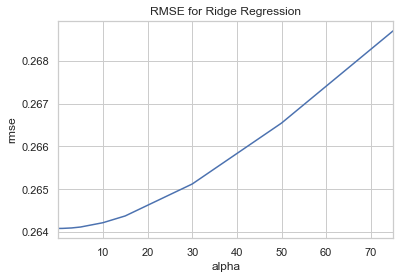

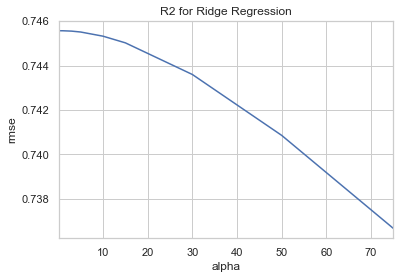

In [246]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_r2_ridge = pd.Series(cv_r2_ridge, index = alphas)

cv_ridge.plot(title = "RMSE for Ridge Regression")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

cv_r2_ridge.plot(title = "R2 for Ridge Regression")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()


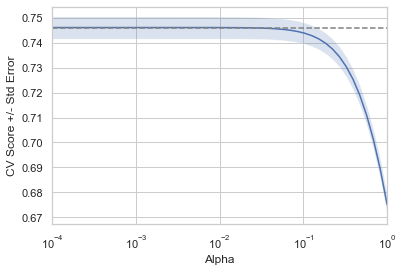

In [247]:
# Create an array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, x_train, y_train, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Use this function to create a plot    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [248]:
print("Best RMSE %.3f for alpha %.3f"%(cv_ridge.min(),cv_ridge.idxmin()))
print("Best R2 %.3f for alpha %.3f"%(cv_r2_ridge.max(),cv_r2_ridge.idxmax()))
#print("Why the difference? R2[10]=%.6f R2[15]=%.6f"%(cv_r2_ridge[cv_ridge.idxmin()],cv_r2_ridge[cv_r2_ridge.idxmax()]))

Best RMSE 0.264 for alpha 0.300
Best R2 0.746 for alpha 0.500


## b. Lasso Regression (L1)

We now test Lasso regression. As before we need to test different values of \alpha. Let' try out the Lasso model. For some reason the alphas in Lasso CV are really the inverse or the alphas in Ridge.

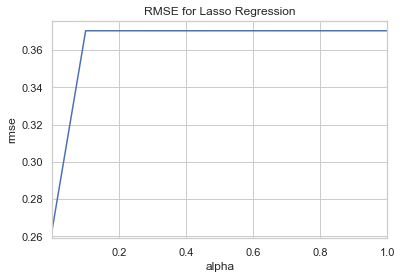

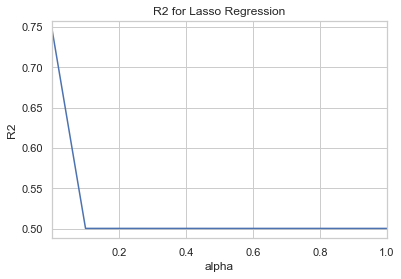

In [249]:
alphas = [1, 0.1, 0.001, 0.0005]
cv_lasso = [rmse_cv(Lasso(alpha = alpha), x_train, y_train).mean() for alpha in alphas]
cv_r2_lasso = [r2_cv(Lasso(alpha = alpha),x_train, y_train).mean() for alpha in alphas]

cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_r2_lasso = pd.Series(cv_r2_lasso, index = alphas)

plt.figure(figsize=(6,4))
cv_lasso.plot(title = "RMSE for Lasso Regression")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

plt.figure(figsize=(6,4))
cv_r2_lasso.plot(title = "R2 for Lasso Regression")
plt.xlabel("alpha")
plt.ylabel("R2")
plt.show()

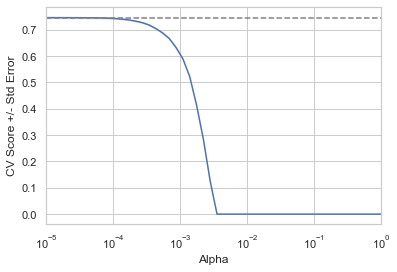

In [250]:
# Create an array of alphas and lists to store scores
alpha_space = np.logspace(-5, 0, 50)
lasso_scores = []
lasso_scores_std = []

# Create a lasso regressor: lasso
lasso = Lasso(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: lasso.alpha
    lasso.alpha = alpha
    
    # Perform 10-fold CV: lasso_cv_scores
    lasso_cv_scores = cross_val_score(lasso, x_train, y_train, cv=10)
    
    # Append the mean of lasso_cv_scores to lasso_scores
    lasso_scores.append(np.mean(lasso_cv_scores))
    
    # Append the std of lasso_cv_scores to lasso_scores_std
    lasso_scores_std.append(np.std(lasso_cv_scores))

# Use this function to create a plot    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(lasso_scores, lasso_scores_std)

In [251]:
print("Best RMSE %.3f for alpha %.3f"%(cv_lasso.min(),cv_lasso.idxmin()))
print("Best R2 %.3f for alpha %.3f"%(cv_r2_lasso.max(),cv_r2_lasso.idxmax()))

Best RMSE 0.264 for alpha 0.001
Best R2 0.745 for alpha 0.001


## Lasso & Ridge with Built-in Crossvalidation

Sklearn provides two functions that include crossvalidation as part of the process, namely, LassoCV and RidgeCV.


In [252]:
# find the mean of our cv scores here
print("Average 10-Fold CV Score: {}".format(np.mean(ridge_scores)))

Average 10-Fold CV Score: 0.7398173714089973


# CONCLUSIONS:

Lasso and Ridge regressions do not improve results in terms of RMSE and therefore it confirms that RF is the best model to predict prices.

## APPENDIX:

Since I still have three days I decide to do some additional analysis, like __PCA__, __outliers deletion__ and __Gaussianity check__

## PCA

In [281]:
pca = PCA()
full_fitted_model = pca.fit(x_train)

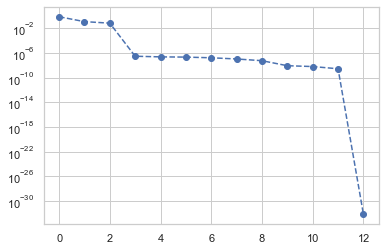

In [282]:
plt.semilogy(full_fitted_model.explained_variance_ratio_, '--o');

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

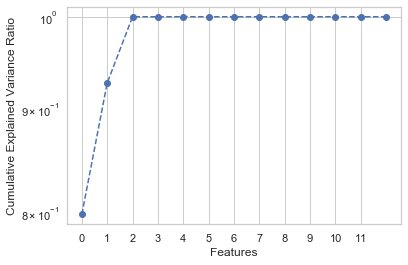

In [293]:
plt.semilogy(full_fitted_model.explained_variance_ratio_.cumsum(), '--o');
plt.xticks(np.arange(0,12,1));
plt.xlabel("Features")
plt.ylabel("Cumulative Explained Variance Ratio")

Two possibilities: 2 or 11 components

In [294]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_scaled)
principalDf = pd.DataFrame(data = principalComponents)

In [295]:
model = LinearRegression()
model.fit(principalDf, y_train)
lr_mse = mean_squared_error(y_train, model.predict(principalDf))
lr_mae = mean_absolute_error(y_train, model.predict(principalDf))
print("TRAIN (LR with 2 PCs): mse = ",lr_mse," & mae = ",lr_mae," & rmse = ", sqrt(lr_mse))

TRAIN (LR with 2 PCs): mse =  0.1209467095787822  & mae =  0.2814425732172117  & rmse =  0.3477739345879478


I get worse results.

In [288]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(train_scaled)
principalDf = pd.DataFrame(data = principalComponents)

In [289]:
model = LinearRegression()

In [290]:
model.fit(principalDf, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [291]:
lr_mse = mean_squared_error(y_train, model.predict(principalDf))
lr_mae = mean_absolute_error(y_train, model.predict(principalDf))

In [292]:
print("TRAIN (LR with 11 PCs): mse = ",lr_mse," & mae = ",lr_mae," & rmse = ", sqrt(lr_mse))

TRAIN (LR with PCA): mse =  0.07024805196426491  & mae =  0.20703720182034185  & rmse =  0.2650434907034408


No improvements. It was quite expected since we keep 11 Principal components over 13 covariates. They're too many.

## OUTLIERS deletion

In [7]:
df = df.drop(['id','date','zipcode','sqft_above','sqft_basement','sqft_lot','sqft_lot15','yr_built','yr_renovated'], axis = 1)

I compute the first and the third interquantiles in order to calculate *IQR*.

In [71]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

In [72]:
IQR = Q3 - Q1

I use it to to delete values x s.t. :

__x < (Q1 - 1.5 * IQR)__

__x > (Q3 + 1.5 * IQR)__

In [73]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [307]:
df_out.shape

(17286, 12)

I fit again two models: *Linear Regression* and *Random Forest*

In [311]:
X = df_out.loc[:,'bedrooms':].copy()
y=df_out.loc[:,'price'].copy()
x_train, x_test, y_train, y_test = train_test_split(X, df_out.loc[:,'price'], test_size = 0.33, random_state=1)

In [313]:
train_scaled = scaler.fit_transform(x_train)
test_scaled = scaler.transform(x_test)

In [314]:
model = LinearRegression()
model.fit(train_scaled, y_train)
lr_mse = mean_squared_error(y_train, model.predict(train_scaled))
lr_mae = mean_absolute_error(y_train, model.predict(train_scaled))
print("TRAIN (lr without outliers): mse = ",lr_mse," & mae = ",lr_mae," & rmse = ", sqrt(lr_mse))

TRAIN (without outliers): mse =  0.06422904788563606  & mae =  0.19706016109820884  & rmse =  0.2534345041339795


In [315]:
lr_test_mse = mean_squared_error(y_test, model.predict(test_scaled))
lr_test_mae = mean_absolute_error(y_test, model.predict(test_scaled))
print("TEST (lr without outliers) mse = ",lr_test_mse," & mae = ",lr_test_mae," & rmse = ", sqrt(lr_test_mse))

mse =  0.06506462195542113  & mae =  0.20036802758032304  & rmse =  0.2550776782774634


An improvement on the results is visibile but they remain again worse than those of Random Forest.

In [316]:
tree_model.fit(train_scaled, y_train)
rf_model.fit(train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [320]:
rf_mse = mean_squared_error(y_train, rf_model.predict(train_scaled))
rf_mae = mean_absolute_error(y_train, rf_model.predict(train_scaled))

print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", math.sqrt(rf_mse))

Random Forest training mse =  0.005996266269702966  & mae =  0.05217534968860696  & rmse =  0.07743556204808592


In [321]:
rf_test_mse = mean_squared_error(y_test, rf_model.predict(test_scaled))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(test_scaled))
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", math.sqrt(rf_test_mse))

Random Forest test mse =  0.03141591443210147  & mae =  0.12770195551934535  & rmse =  0.1772453509463689


And it confirms two aspects: 
    1. Delete outliers in this case was not necessary
    2. RF is the best method for this kind of dataset

## GAUSSIANITY CHECK


In [ ]:
#import pingouin as ping
# conda install -c hargup/label/pypi ping 
#ping.multivariate_normality(df, alpha = 0.05)

To be rigorous I should have applied the above code, however when I try it my computer goes phut. Therefore, instead of looking for multivariate gaussianity, I check univariate gaussianity for each variable.

I decide to use __Shapiro-Wilk test__ since it's considered one of the most strong and robust tests for normality.

In [20]:
from scipy import stats
for i in range(0,df.shape[1]):
    test = stats.shapiro(df.iloc[:,i])
    print(test)

(0.7120139598846436, 0.0)
(0.8489726185798645, 0.0)
(0.9368104934692383, 0.0)
(0.9149821400642395, 0.0)
(0.7506103515625, 0.0)
(0.0578540563583374, 0.0)
(0.3397040367126465, 0.0)
(0.6976151466369629, 0.0)
(0.8952866196632385, 0.0)
(0.956612229347229, 0.0)
(0.9391594529151917, 0.0)
(0.9319114089012146, 0.0)


C:\Users\emanuele.bolognini\anac\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning:

p-value may not be accurate for N > 5000.



However with huge (in terms of dimensions) dataset, p-values may not be accurate. Therefore to be sure of the result I apply a non-parametric test (my favourite ones!), e.g. __Kolmogorov–Smirnov test__ that in few words performs a test of the distribution G(x) of an observed random variable against a given distribution F(x). Under the null hypothesis the two distributions are identical, G(x)=F(x)

In [24]:
for i in range(0,df.shape[1]):
    test = stats.kstest(df.iloc[:,i],'norm')
    print(test)

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.9674409567484386, pvalue=0.0)
KstestResult(statistic=0.8373656594077369, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.8413447460685429, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.9893038751604303, pvalue=0.0)
KstestResult(statistic=0.9997832549599899, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


No Gaussian data. I plot qq-lines after transforming data with __log1p__.

Text(0.5, 0, 'log(1+price)')

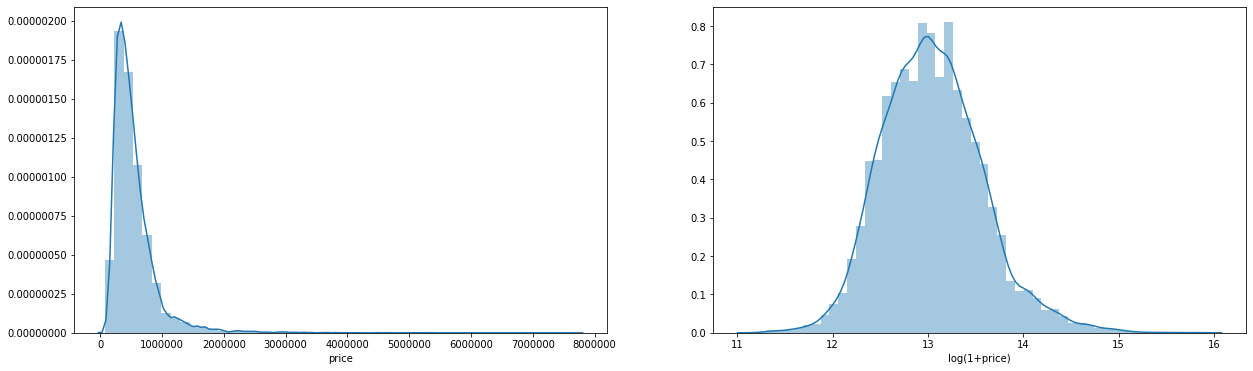

In [31]:
fig, axes = plt.subplots(1,2, figsize=(21,6))

sns.distplot(df['price'], ax=axes[0])
sns.distplot(np.log1p(df['price']), ax=axes[1])

axes[1].set_xlabel('log(1+price)')


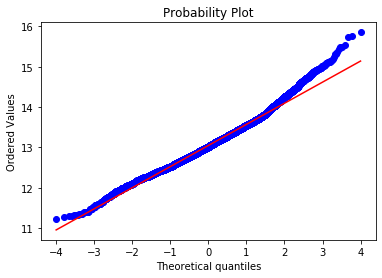

In [32]:
import numpy as np 
import pylab 
import scipy.stats as stats
 
stats.probplot(np.log1p(df.iloc[:,0]), dist="norm", plot=pylab)
pylab.show()

Still not completely gaussian, but acceptable.

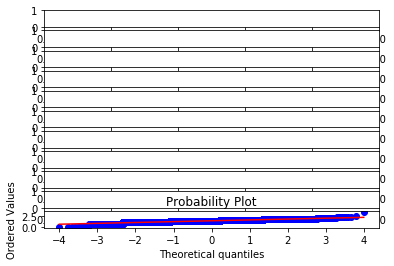

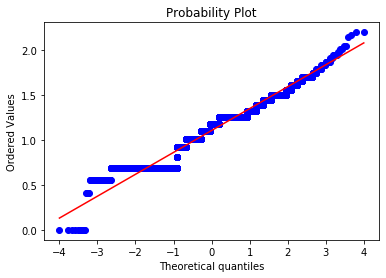

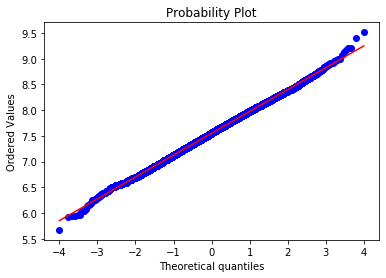

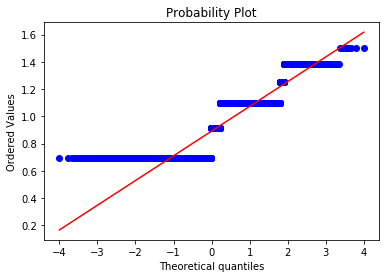

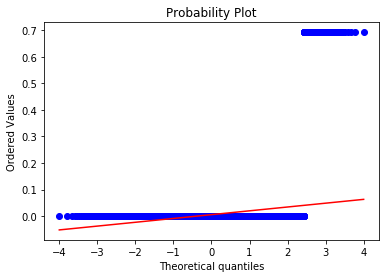

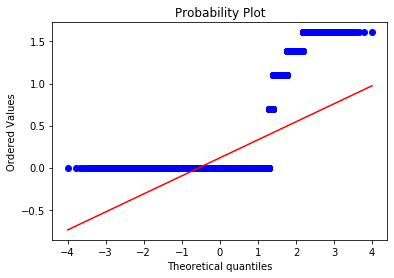

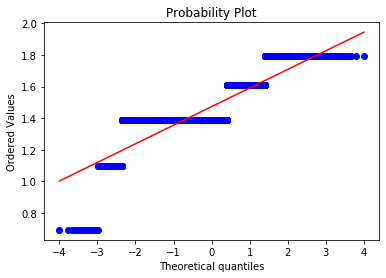

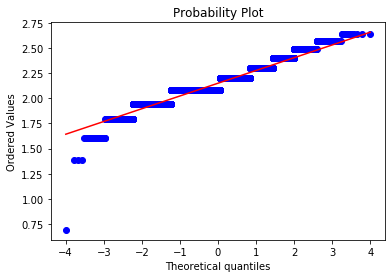

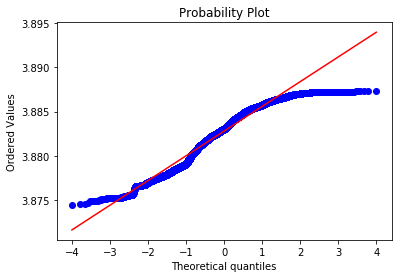

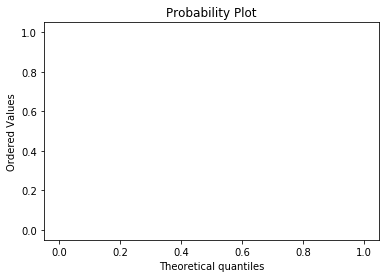

In [51]:
fig, axs = plt.subplots(11)
import statsmodels.api as sm
for i in range(1,df.shape[1]-1):
    #plt.subplot(4,4,i)
    stats.probplot(np.log1p(df.iloc[:,i]), dist="norm", plot=pylab)
    axs[i]=pylab.show()

There's again no gaussianity! I would like to apply __boxcox__ transformation, but it requires positive data. Indeed the following code goes in error:

ValueError: Data must be positive.

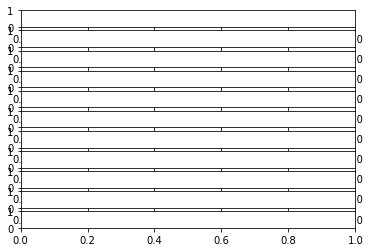

In [56]:
fig, axs = plt.subplots(11)
import statsmodels.api as sm
for i in range(1,df.shape[1]-1):
    #plt.subplot(4,4,i)
    stats.probplot(stats.boxcox(df.iloc[:,i],-1), dist="norm", plot=pylab)
    axs[i]=pylab.show()

Another trick (not recommended) is to *add a Gaussian noise* to the dataset, with <u>zero mean</u> and <u>low variance</u> in order to not alterate its shape.

In [84]:
mu, sigma = 0, 0.1
# creating a noise with the same dimension as the dataset 
noise = np.random.normal(mu, sigma, [df.shape[0], df.shape[1]]) 
df = df + noise

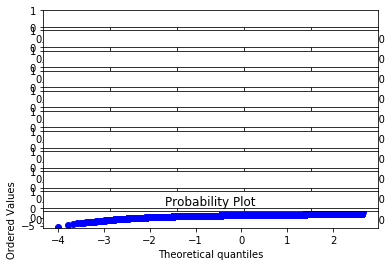

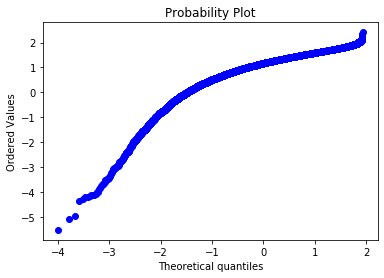

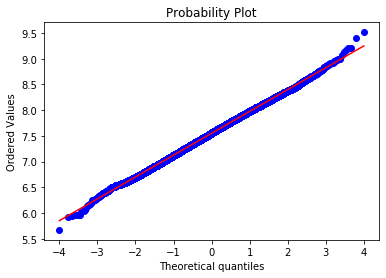

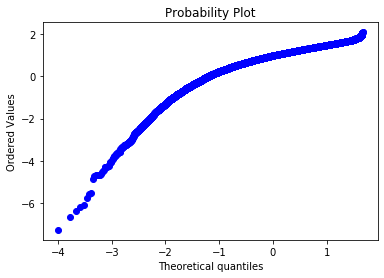

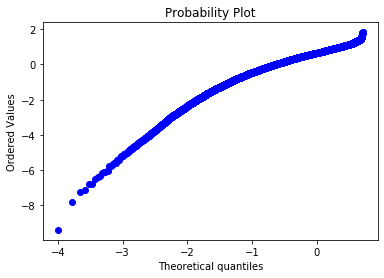

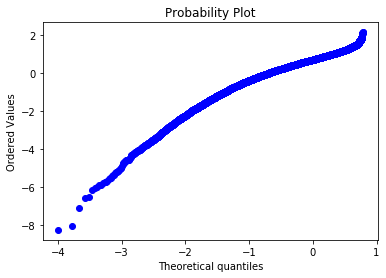

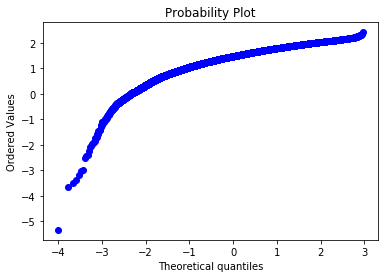

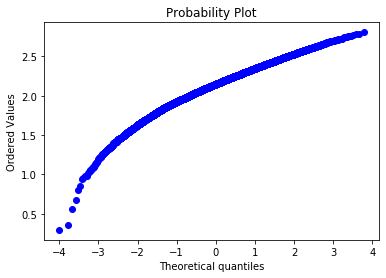

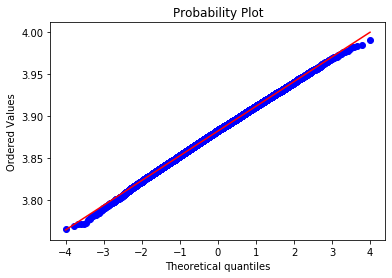

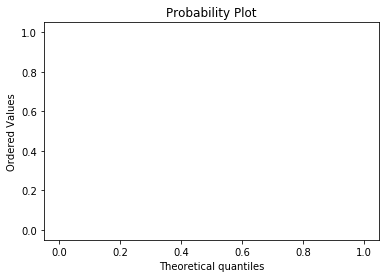

In [85]:
fig, axs = plt.subplots(11)
import statsmodels.api as sm
for i in range(1,df.shape[1]-1):
    #plt.subplot(4,4,i)
    stats.probplot(np.log1p(df.iloc[:,i]), dist="norm", plot=pylab)
    axs[i]=pylab.show()

I see an improvement but not so significant. 

What comes into to my minds now is to add this gaussian noise to the reduced dataset, the one without outliers:

In [87]:
noise2 = np.random.normal(mu, sigma, [df_out.shape[0], df_out.shape[1]]) 

In [88]:
df_out = df_out + noise2

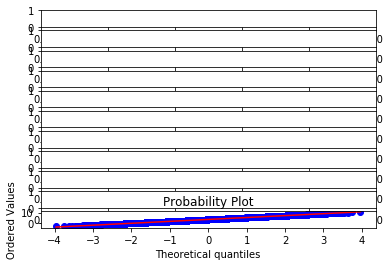

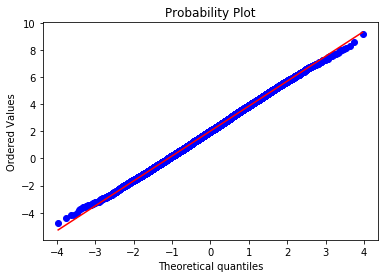

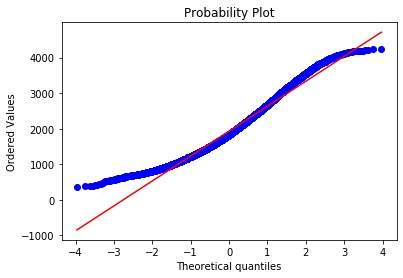

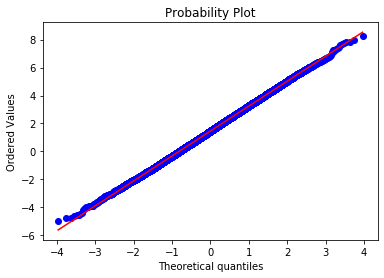

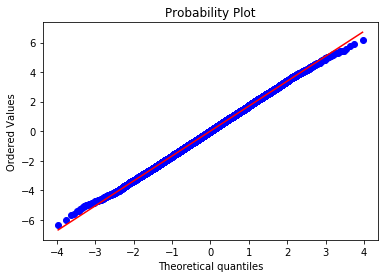

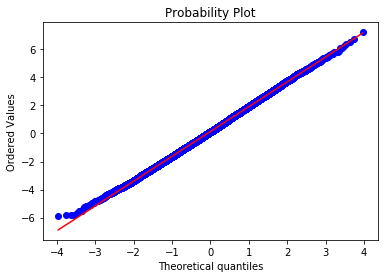

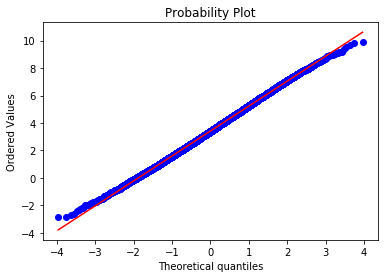

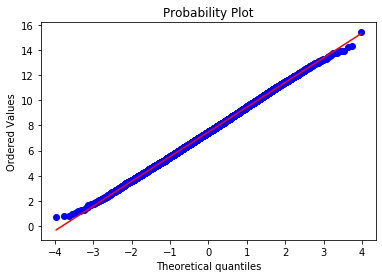

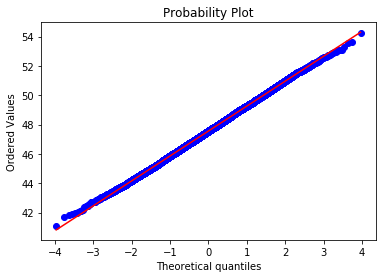

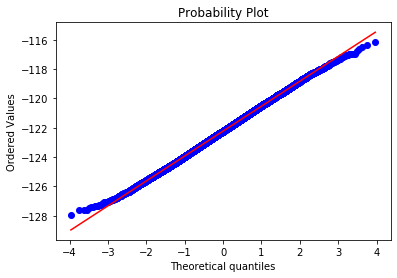

In [90]:
fig, axs = plt.subplots(11)
import statsmodels.api as sm
for i in range(1,df_out.shape[1]-1):
    #plt.subplot(4,4,i)
    stats.probplot(df_out.iloc[:,i], dist="norm", plot=pylab)
    axs[i]=pylab.show()

Now I get an acceptable result in terms of gaussianity.